# ¿Es posible ganar al jugar blackjack?

## Introducción

El blackjack, un juego de cartas emblemático en la industria del juego, ha alcanzado una fama considerable gracias a su combinación única de simplicidad y emoción. Su popularidad se debe, en parte, a la facilidad con la que los jugadores pueden comprender sus reglas, así como a la simplicidad de las decisiones que deben tomar en comparación con otros juegos de cartas, como el póker. A diferencia de estos últimos, el blackjack presenta un conjunto limitado de elecciones durante cada mano, lo que contribuye a su atractivo universal.

La esencia de la simplicidad en el juego radica en las decisiones estratégicas que los jugadores toman al solicitar o plantarse, aspecto que lo distingue de manera significativa de juegos de azar más puramente basados en la suerte, como la ruleta. La capacidad del jugador para influir en el desarrollo del juego mediante decisiones informadas agrega un elemento estratégico y desafiante al blackjack, convirtiéndolo en una elección intrigante para la modelación matemática.

En este trabajo, nos enfocamos en modelar un juego de blackjack con la introducción de jugadores automáticos, cada uno con parámetros específicos que determinan sus decisiones durante el juego. Esta aproximación nos permite explorar cómo ciertos factores pueden influir en las pérdidas o ganancias acumuladas a lo largo del tiempo, contribuyendo así a la comprensión más profunda de las estrategias óptimas en el blackjack.

## Modelo que realizare

### Reglas del juego

**Objetivo del Juego:**

El objetivo del blackjack es obtener una mano cuyo valor sea lo más cercano posible a 21, pero sin pasarse.

**Valor de las Cartas:**

Las cartas numeradas (2-10) tienen su valor nominal.
Las cartas de figuras (J, Q, K) valen cada una 10 puntos.
Los ases pueden valer 1 u 11, dependiendo de cuál valor beneficie más a la mano.

**Desarrollo de una Ronda:**

Cada jugador, incluido el crupier, recibe dos cartas al principio.
Los jugadores pueden ver una de las cartas del crupier y tomar decisiones basadas en esa información.

**Decisiones del Jugador:**

Pedir (Hit): Tomar una carta adicional para tratar de acercarse a 21.

Plantarse (Stand): Permanecer con las cartas actuales y no tomar más.

**Decisiones Especiales:**

Doblar (Double Down): Duplicar la apuesta original y recibir exactamente una carta adicional.

Dividir (Split): Si las dos cartas iniciales son del mismo valor, se pueden separar en dos manos diferentes, cada una con su apuesta.

**Ganar y Perder:**

Un jugador gana si tiene una mano más cercana a 21 que el crupier sin pasarse.
Si la mano del jugador supera los 21 puntos, pierde automáticamente (se "quiebra").
Si el crupier se pasa de 21, los jugadores que aún estén en juego ganan.

**Blackjack:**

Un blackjack (21 con solo dos cartas) generalmente paga 3:2, a menos que el crupier también tenga un blackjack, en cuyo caso es un empate.

**Empate (Push):**

Si el jugador y el crupier tienen el mismo total de puntos, se declara un empate y el jugador recupera su apuesta.

### Parametros a tomar en cuenta

La desición de los jugadores de pedir o plantarse toma en cuenta numerosos factores, como estrategias personales, experiencia previa e incluso un poco de azar con supersticiones y demas.

Tomar en cuenta todas estas variables es una mision sumamente complicada y la cual simplificare en mi modelo, usando el concepto de ''Números seguros''.

Mi modelo tratara de replicar partidas de blackjack de 2 jugadores y el crupier y mis parametros de mi modelo seran los ya mencionados ''Números seguros'' de cada jugador.

Estos números denotaran el número el cual si la suma del valor de la mano del jugador supera o iguala su parametro asociado este jugador se plantara y unicamente esperara el final de la ronda.

Tambien las acciones que se pueden tomar en el juego referentes a la apuesta o a un cambio en la jugabilidad que tienes, seran omitidas pues solo tomare las decisiones que afecten el transcurso de la partida.

### Objetivos

Como se menciono el objetivo de este modelo es observar como se comportan los juegos con combinaciones de parametros y observar si dado el parametro de tus rivales (El cual puedes deducir con algunas rondas) tus ganacias se maxifican o por los menos tus perdidas se minimicen

## Resultados

Se puede observar que con números seguros ‘‘habituales’’, los resultados son pésimos, habiendo una clara superioridad de derrotas sobre victorias y empates, habiendo un marcador de -1498, donde el marcador está dado como, -1 si pierdes, 0 si empatas y +1 si ganas.

Definiendo una función que me simule los marcadores en 100 partidas de blackjack 500 veces puedo observar cómo se comporta el promedio muestral y gráficamente observar si converge a algo e incluso dar una aproximación a la Esperanza del marcador en 100 partidas

Podria incluso afirmar que la probabilidad de ganar es bastante baja debido a que realizando el modelado con Numeros seguros absurdos de parte del rival y el crupier, mi ventaja de victorias es approximadamente de un número entre 0 y 2, lo cual es un resultado interesante, el saber que solo en situaciones absurdas consigues una victoria probabilistica nos habla del gran negocio que es este juego juego logrando que los jugadores pierdan una gran proporcion de sus partidas jugadas

## Conclusión

En conclusión se puede teorizar que al jugar blackjack las probabilidades no estan a tu favor y en un número de partidas grande terminas acercandote más a una media la cual sigue siendo un número poco esperanzador, obteniendo valores negativos y ganando una cantidad pobre de partidas

#Implementación código

In [1]:
import random
import matplotlib.pyplot as plt

## Funciones

Al ser blackjack el juego que estamos modelando, el palo de la carta realmente no nos importa, solo nos preocupa su número

In [2]:
Número=[2,3,4,5,6,7,8,9,10,'J','Q','K','A']
Baraja=4*Número

Ya tenemos lo que es una baraja sin importar su palo

La implementación del metodo de Montecarlo se realizara al momento de elejir una carta, pues como se dijo en las suposiciones esta sera una baraja justa, aunque podriamos hacer un vector de probabilidades de una baraja no justa y observar como se comporta

In [3]:
def elejir_carta(Baraja):
  vectprob=[]
  for i in range (len(Baraja)+1):
    vectprob.append(i/len(Baraja))
  x=random.random()
  if x==0:
    x= Baraja[0]
  else:
    for j in range (len(Baraja)):
      if vectprob[j]<x<=vectprob[j+1]:
        x= Baraja[j]
        break
  Baraja.remove(x)
  if x=='J'or x=='Q' or x=='K':
    x=10
  if x=='A':
    y=random.random()
    if 0<=y<=0.5:
      x=11
    if 0.5<y<=1:
      x=1
  return x

In [4]:
def blackjack(NSA,NSB,NSC,Baraja):
#Realizo el primer acomodo de cartas donde a cada jugador se le dan 2 y la casa tiene 2
  Base=[elejir_carta(Baraja),elejir_carta(Baraja)]
  A=[elejir_carta(Baraja),elejir_carta(Baraja)]
  B=[elejir_carta(Baraja),elejir_carta(Baraja)]

#Mientras alguno de los jugadores aun no llegue a su ''Número seguro'' el juego continuara
  while sum(A)<NSA or sum(B)<NSB:
  #Se realiza una supuesta elección (Aun sin agregarse a la mano de los jugadores)
  #Si alguno ya llego o supero a su Número seguro su eleccion no se toma en cuenta, es como si no se hubiera hecho
    a=elejir_carta(Baraja)
    if sum(A)>=NSA:
      Baraja.append(a)
      a=0

    b=elejir_carta(Baraja)
    if sum(B)>=NSB:
      Baraja.append(b)
      b=0
  #Una ves decidido las elecciones, estas se confirman agregandose a la mano de los jugadores
    A.append(a)
    B.append(b)

  #Se aplica lo mismo al final a la mano de la casa
  while sum(Base)<NSC:
    c=elejir_carta(Baraja)
    Base.append(c)
  return sum(A),sum(B),sum(Base)

Una ves realizado el juego suponiendo que somos el jugador A terminamos en una de estas opciones

-Empatamos = 0

-Ganamos = +1

-Perdimos = -1


In [5]:
def Ganador(NSA,NSB,NSC,Baraja):
  #En este caso supondremos que nosotros somos el jugador A, por lo tanto solo ganamos, perdemos o empatamos
  a,b,c=blackjack(NSA,NSB,NSC,Baraja)
  Contador = 0

#Si en primer lugar ya nos pasamos de 21, perdemos la partida automaticamente
  if a>21:
    Contador = -1

#Si justo tenemos 21 hay 2 posibilidades
  if a==21:
  #Si alguien mas obtuvo 21 entonces empatas
    if c==21 or b==21:
      Contador = 0
  #De otra forma ganas la partida
    else:
      Contador = 1

#El caso en el que tienes menos de 21
  if a<21:
  #Ganas si tanto el otro jugador como la casa tienes más de 21
    if b>21 and c>21:
      Contador = 1

  #Si el otro jugador o la casa obtienen 21, pierdes la partida
    if b==21 or c==21:
      Contador = -1

  #Ahora el caso en el que alguno de el jugador B o la casa obtienen menos de 21 y ninguno obtuvo 21
    if b<21 or c<21:

    #El caso en el que alguno se paso de 21 para poder comparar los demas haremos que su valor sea 0
      if b>21:
        b=0
      if c>21:
        c=0

    #Omitiendo los casos donde sean mayores o iguales a 21, eres mayor que los otros, ganas
      if a>c and a>b:
        Contador=1
      elif a==b or a==c:
        Contador=0
      else:
        Contador=-1

  return Contador

## Histogramas

Ahora correremos este juego con distintos números seguros y veremos que tal

Tú numero seguro = 16
Número seguro de tu rival = 19
Número seguro de la casa = 17
El marcador final fue -1666


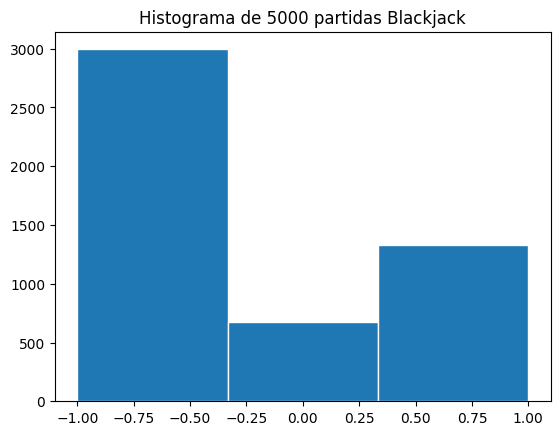

In [6]:
NSA=16
#Número seguro que nosotros nos impondremos


NSB=19
#Número seguro del rival

NSC=17
#Número seguro de la casa, casi siempre es 17 aunque puede variar y casi nunca es un número muy riesgoso


G=[] #Lista donde se agregara si ganamos, perdimos o empatamos
for _ in range (5000): #Realizaremos 5000 iteraciones
  Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A'] #cada iteración cargamos una nueva baraja
  g=Ganador(NSA,NSB,NSC,Baraja)
  G.append(g)
Promedio=sum(G)/len(G)
Marcador=sum(G)

plt.title('Histograma de 5000 partidas Blackjack')
plt.hist(G,density = False,bins=3,edgecolor = "white")
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'El marcador final fue {Marcador}')

Tú numero seguro = 16
Número seguro de tu rival = 19
Número seguro de la casa = 17
La esperanza del marcador en 100 partidas es aprox de -32.37598518928905


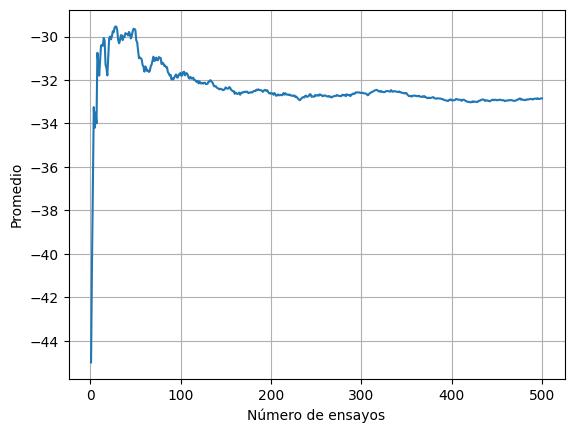

In [7]:
#Ahora realizaremos 500 simulaciones de 100 partidas y observaremos cual es el promedio del marcadaror en i simulaciones con i desde 1 hasta 500
#Simulando la LGN pues cada marcador de 500 partidas es independiente uno de otro y se distribuyen igual
prom=[] #Lista donde estare agregando las sumas de las i variables sobre i
T=[] #Lista donde agregare el i número dee variables a considerar
S=[0] #Usare el unico elemento en esta lista para ir almacenando en cada iteración el valor de la suma de las variables
for i in range (1,501): #El rango es dado asi pues i no puede ser 0 y quiero 500 iteraciones
  T.append(i)#Primero agrego el i respectivo a mi lista T
  G=[] #Lista donde se agregara si ganamos, perdimos o empatamos
  for _ in range (100): #Esta es la función anterior que me determina en 100 partidas como esta el marcador
    Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A'] #cada iteración cargamos una nueva baraja
    g=Ganador(NSA,NSB,NSC,Baraja)
    G.append(g)
  S[0]=S[0]+sum(G)#A mi número en S le agrego el nuevo marcador, haciendo que cada iteracion S tenga la suma de los marcadores
  prom.append(S[0]/i) #Agrego a mi lista prom la suma de marcadores entre el i respectivo


plt.plot(T,prom) #Por ultimo grafico y menciono los datos
plt.grid()
plt.xlabel('Número de ensayos')
plt.ylabel('Promedio')
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'La esperanza del marcador en 100 partidas es aprox de {sum(prom)/len(prom)}')

Tú numero seguro = [14, 20, 18]
Número seguro de tu rival = [18, 16, 14]
Número seguro de la casa = 17
El marcador final fue-1900


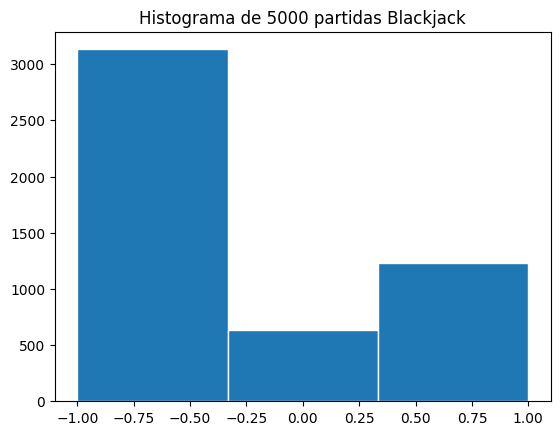

In [8]:
#Para modelar un escenario mas realista, podriamos hacer que los números seguros
# cambiaran aleatoriamente de una lista  a la cual el jugador se apegara


NSA=[14,20,18]

NSB=[18,16,14]

NSC=17


G=[] #Lista donde se agregara si ganamos, perdimos o empatamos
for _ in range (5000): #Realizaremos 5000 iteraciones
  Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A'] #cada iteración cargamos una nueva baraja
  g=Ganador(random.choice(NSA),random.choice(NSB),NSC,Baraja)
  G.append(g)
Promedio=sum(G)/len(G)
Marcador=sum(G)

plt.title('Histograma de 5000 partidas Blackjack')
plt.hist(G,density = False,bins=3,edgecolor = "white")
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'El marcador final fue{Marcador}')

Tú numero seguro = [14, 20, 18]
Número seguro de tu rival = [18, 16, 14]
Número seguro de la casa = 17
La esperanza del marcador en 100 partidas es aprox de -36.6929789362226


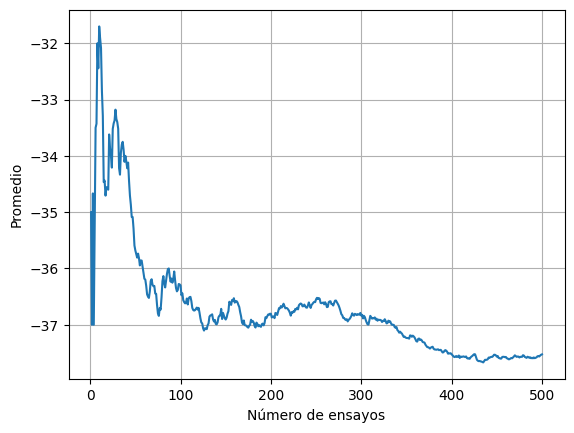

In [9]:
prom=[]
T=[]
S=[0]
for i in range (1,501):
  T.append(i)
  G=[]
  for _ in range (100):
    Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A']
    g=Ganador(random.choice(NSA),random.choice(NSB),NSC,Baraja)
    G.append(g)
  S[0]=S[0]+sum(G)
  prom.append(S[0]/i)


plt.plot(T,prom)
plt.grid()
plt.xlabel('Número de ensayos')
plt.ylabel('Promedio')
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'La esperanza del marcador en 100 partidas es aprox de {sum(prom)/len(prom)}')

Tú numero seguro = 17
Número seguro de tu rival = 2
Número seguro de la casa = 2
El marcador final fue 70


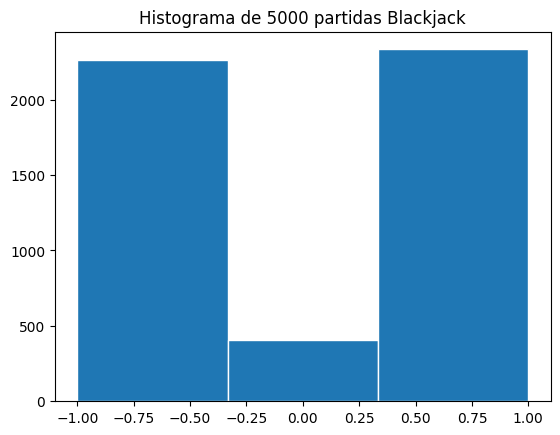

In [10]:
NSA=17
#Número seguro que nosotros nos impondremos


NSB=2
#Número seguro del rival

NSC=2
#Número seguro de la casa, casi siempre es 17 aunque puede variar y casi nunca es un número muy riesgoso


G=[] #Lista donde se agregara si ganamos, perdimos o empatamos
for _ in range (5000): #Realizaremos 5000 iteraciones
  Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A'] #cada iteración cargamos una nueva baraja
  g=Ganador(NSA,NSB,NSC,Baraja)
  G.append(g)
Promedio=sum(G)/len(G)
Marcador=sum(G)

plt.title('Histograma de 5000 partidas Blackjack')
plt.hist(G,density = False,bins=3,edgecolor = "white")
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'El marcador final fue {Marcador}')

Tú numero seguro = 17
Número seguro de tu rival = 2
Número seguro de la casa = 2
La esperanza del marcador en 100 partidas es aprox de 2.243003464856395


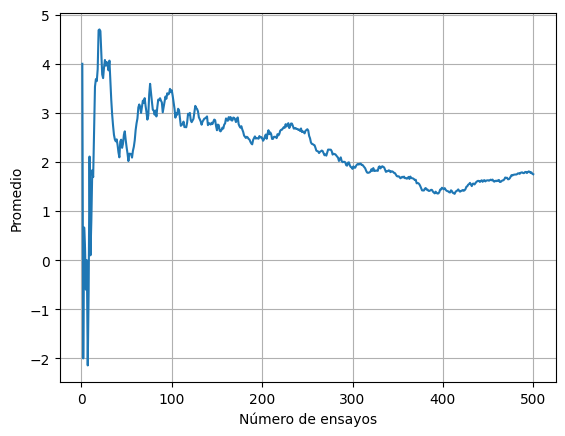

In [11]:
prom=[]
T=[]
S=[0]
for i in range (1,501):
  T.append(i)
  G=[]
  for _ in range (100):
    Baraja=4*[2,3,4,5,6,7,8,9,10,'J','Q','K','A']
    g=Ganador(NSA,NSB,NSC,Baraja)
    G.append(g)
  S[0]=S[0]+sum(G)
  prom.append(S[0]/i)


plt.plot(T,prom)
plt.grid()
plt.xlabel('Número de ensayos')
plt.ylabel('Promedio')
print(f'Tú numero seguro = {NSA}')
print(f'Número seguro de tu rival = {NSB}')
print(f'Número seguro de la casa = {NSC}')
print(f'La esperanza del marcador en 100 partidas es aprox de {sum(prom)/len(prom)}')